In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from numpy import asarray
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

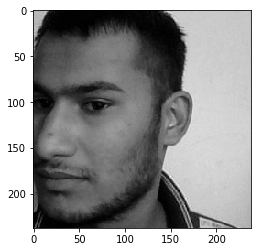

In [12]:
DATADIR = r"C:\Users\hp\Desktop\Career Excellence Maam\Face Recognition\dataset2"

CATEGORIES = ["Mayank", "Vanshika"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
       #...and one more!
        break
    break

In [13]:
img_array.shape

(238, 238)

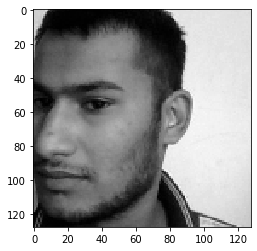

In [21]:
IMG_SIZE=128
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [22]:
new_array.shape

(128, 128)

In [23]:
photos = list()
labels = list()
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
    print(category)
    print(path)
    print(class_num)
    for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE )  # convert to array
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            photos.append(new_array)  # add this to our training_data
            labels.append(class_num)
        except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
        except Exception as e:
                print("general exception", e, os.path.join(path,img))
                
                
photos = asarray(photos)
labels = asarray(labels)

  1%|▋                                                                                 | 4/450 [00:00<00:15, 28.10it/s]

Mayank
C:\Users\hp\Desktop\Career Excellence Maam\Face Recognition\dataset2\Mayank
0


  2%|█▋                                                                                | 9/441 [00:00<00:06, 65.42it/s]

Vanshika
C:\Users\hp\Desktop\Career Excellence Maam\Face Recognition\dataset2\Vanshika
1


100%|████████████████████████████████████████████████████████████████████████████████| 441/441 [00:07<00:00, 55.13it/s]


In [38]:
photos.shape

(891, 128, 128)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
     photos, labels, test_size=0.33, random_state=1234)
x_train, x_valid, y_train, y_valid = train_test_split(
     x_train, y_train, test_size=0.05, random_state=1234)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(566, 128, 128)
(295, 128, 128)
(30, 128, 128)
(566,)
(295,)
(30,)


In [41]:
x_train = x_train.reshape((x_train.shape[0], 128,128,1))
x_test = x_test.reshape((x_test.shape[0], 128, 128,1))
x_valid = x_valid.reshape((x_valid.shape[0], 128, 128,1))
x_train = np.array(x_train,dtype='float32')/255
x_test = np.array(x_test,dtype='float32')/255
x_valid = np.array(x_valid,dtype='float32')/255

In [42]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(566, 128, 128, 1)
(295, 128, 128, 1)
(30, 128, 128, 1)


In [45]:
mv_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= (128,128,1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(2, activation='softmax')  
])

mv_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [46]:
mv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 122, 122, 36)      1800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 54)        48654     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 54)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 42336)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2024)              85690088  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2024)             

In [47]:
history=mv_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=150, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/150
2/2 - 17s - loss: 0.6967 - accuracy: 0.4894 - val_loss: 0.6555 - val_accuracy: 0.8000
Epoch 2/150
2/2 - 5s - loss: 0.6721 - accuracy: 0.5866 - val_loss: 0.6278 - val_accuracy: 0.7333
Epoch 3/150
2/2 - 2s - loss: 0.6724 - accuracy: 0.5830 - val_loss: 0.6148 - val_accuracy: 0.9333
Epoch 4/150
2/2 - 7s - loss: 0.6591 - accuracy: 0.6148 - val_loss: 0.6159 - val_accuracy: 0.8333
Epoch 5/150
2/2 - 2s - loss: 0.6292 - accuracy: 0.6502 - val_loss: 0.6047 - val_accuracy: 0.8000
Epoch 6/150
2/2 - 2s - loss: 0.6318 - accuracy: 0.6502 - val_loss: 0.5439 - val_accuracy: 0.8667
Epoch 7/150
2/2 - 2s - loss: 0.5901 - accuracy: 0.6820 - val_loss: 0.4602 - val_accuracy: 0.9667
Epoch 8/150
2/2 - 2s - loss: 0.5474 - accuracy: 0.7597 - val_loss: 0.3916 - val_accuracy: 0.9667
Epoch 9/150
2/2 - 2s - loss: 0.5061 - accuracy: 0.7756 - val_loss: 0.3307 - val_accuracy: 0.9667
Epoch 10/150
2/2 - 2s - loss: 0.4527 - accuracy: 0.8392 - val_loss: 0.2922 - val_accuracy: 0.9667
Epoch 11/150
2/2 - 7s - loss

Epoch 84/150
2/2 - 2s - loss: 2.9139e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 85/150
2/2 - 2s - loss: 4.2658e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 86/150
2/2 - 2s - loss: 3.6225e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 87/150
2/2 - 2s - loss: 4.1514e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 88/150
2/2 - 2s - loss: 3.6769e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 89/150
2/2 - 2s - loss: 2.9348e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 90/150
2/2 - 2s - loss: 2.2996e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 91/150
2/2 - 2s - loss: 1.8893e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 92/150
2/2 - 2s - loss: 2.2569e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 93/150
2/2 - 2s - loss: 4.2420e-04 - accuracy: 1.0000 - val_loss: 0.0014 - v

In [48]:
mv_model.save(r"C:\Users\hp\Desktop\Career Excellence Maam\Face Recognition\FaceRecognitionMV.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\hp\Desktop\Career Excellence Maam\Face Recognition\FaceRecognitionMV.model\assets


In [ ]:
model = keras.models.load_model(r"C:\Users\hp\Desktop\Career Excellence Maam\Face Recognition\FaceRecognitionMV.model")

In [54]:
testing = x_test[0].reshape(1,128,128,1)
testing.shape

(1, 128, 128, 1)

In [55]:
p = mv_model.predict(testing)

In [56]:
CATEGORIES[np.argmax(p)]

'Vanshika'

In [52]:
y_test[50]

0

In [53]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1])